In [ ]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [ ]:
# BMI calculator
# input > cal bmi > output

# linear sequential workflow

In [ ]:
# creating state
class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float

In [ ]:
# creating graph(liner)
graph = StateGraph(BMIState)

In [ ]:
# python function to be added as node
def bmi_calc(state: BMIState) -> BMIState:
    # extracting info from state input
    weight = state['weight_kg']
    height = state['height_m']

    # calculating BMI
    bmi = weight/(height**2)

    # updating state with calculated BMI value
    state['bmi'] = round(bmi, 2)

    return state


# adding above function as a node
graph.add_node('bmi_calc', bmi_calc)

In [ ]:
# adding edges
graph.add_edge(START, 'bmi_calc')

graph.add_edge('bmi_calc', END)

In [ ]:
# compile the graph
workflow = graph.compile()

In [ ]:
# execute the graph
final_state = workflow.invoke({'weight_kg':86, 'height_m':1.82})
final_state

{'weight_kg': 86, 'height_m': 1.82, 'bmi': 25.96}

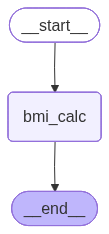

In [ ]:
# visualize graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())